In [ ]:
!gdown -q 11Cxt5om7r7xuWEhMWlmljX-PHag9adZq

In [ ]:
# Reading the Libraries
import pandas as pd
import numpy as np

# Reading the Data
data = pd.read_csv('/content/data.csv')
data.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [ ]:
data.shape

(569, 33)

Let's have a look at the health of the data itself. This function `info()` in the pandas library is very helpful to understand the basic properties of the data itself. If there is any missing values in the dataset can be known right from here so that they can be taken care of before fitting into a model for training and testing.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**There are 3 things that take my attention.**


1.   There is an `id` that cannot be used for classificaiton
2.   `Diagnosis` column in the data is our class label
3.   `Unnamed: 32` feature includes `NaN` so we do not need it.




In [ ]:
col = data.columns       
print(col)
print(len(col))

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
33


In [ ]:
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y_data = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)
x_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
print(y_data)
print(y_data.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

Okay, now we have the features but **what do they mean**, or actually **how much do we need to know about these features**. The answer is that we do not need to know the meaning of these features. However, to imagine in our mind, we should know something like variance, standard deviation, number of the sample (count), or max-min values. This type of information helps to understand what is going on in data. For example, this question appears in my mind that the `area_mean` feature's max value is `2500` and `smoothness_mean` features' max `0.16340`. Therefore **do we need standardization or normalization before visualization, feature selection, feature extraction, or classification**? The answer is yes and no not surprising ha :) Anyway, let us go step by step and start with visualization.

**Normalization**<br>
Normalization refers to rescaling real-valued numeric attributes into a `0 to 1` range. Data normalization is used in machine learning to make model training less sensitive to the scale of features.

You can either implement the conversion process with basic python or use `MinMaxScaler()` function from the `sklearn` library.

In [ ]:
# Using transformer from sklearn library
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
output = scalar.fit_transform(x_data)

# Manual Implementation of the normalization process
X_data = (x_data -np.min(x_data))/ (np.max(x_data)-np.min(x_data)).values

In [ ]:
X_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


**The Basics: Logistic Regression and Regularization**

Logistic Regression is one of the most common machine learning algorithms used for classification. It is a statistical model that uses a logistic function to model a binary dependent variable. In essence, it predicts the probability of an observation belonging to a certain class or label. For instance, is this a cat photo or a dog photo?

Ordinary Least Squares linear regression is powerful and versatile right out of the box, but there are certain circumstances where it fails.

1. It is, expressly, a ‘regression’ framework, which makes it hard to apply as a classifier.
2. Unlike, say, a decision tree, linear regression models don’t perform their implicit feature selection, meaning they are prone to overfit if too many features are included.

Luckily, there are some extensions to the linear model that allow us to overcome these issues. Logistic regression turns the linear regression framework into a classifier and various types of `regularization` of which the `Ridge` and `Lasso` methods are most common, help avoid overfit in feature-rich instances.

### **Hypothesis** 
We want our model to predict the probability of an observation belonging to a certain class or label. As such, we want a hypothesis $h$ that satisfies the following condition $0 <= h(x) <= 1$ , where $x$ is an observation.

We define $h(x) = g(w^T * x)$ , where $g$ is a sigmoid function and $w$ are the trainable parameters or `weights`. As such, we have:
$$h(x) = \frac{1}{1+e^{-w^Tx}}$$

### The cost for an observation 
Now that we can predict the probability for an observation, we want the result to have the minimum error. If the class label is $y$, the cost (error) associated with an observation $x$ is given by:

![](https://miro.medium.com/max/525/1*vSGnYVz6I7sAObKuxuFAoQ.gif)

### Cost Function
Thus, the total cost for all the $`$ observations in a dataset is:
![](https://miro.medium.com/max/368/0*vZnp94vCoN0vMDAj)

We can rewrite the cost function J as:
![](https://miro.medium.com/max/691/0*o57ug0iMGDJVI1qo)

The objective of logistic regression is to find params `w` so that `J` is minimum. How can we do that?? We will use the gradient descent algorithm to update each of the weights gradually to minimize the cost `J`. 

We will update each of the params wᵢ using the following template:
![](https://miro.medium.com/max/875/0*Q6ssvXABrvHUZrfy)
![](https://miro.medium.com/max/496/0*7uVvuW-ZGauNWH_V)

The above step will help us find a set of params wᵢ, which will then help us to come up with $h(x)$ to solve our binary classification task.
But there is also an undesirable outcome associated with the above gradient descent steps. In an attempt to find the best $h(x)$, the following things happen:

**CASE I: For class label = 0**: $h(x)$ will try to produce results as close 0 as possible. As such, $w^T.x$ will be as small as possible
=> Wi will tend to -infinity

**CASE II: For class label = 1**: $h(x)$ will try to produce results as close 1 as possible. As such, $w^T.x$ will be as large as possible
=> Wi will tend to +infinity


## Regularization
Regularization is a technique to solve the problem of overfitting in a machine learning algorithm by penalizing the cost function. It does so by using an additional penalty term in the cost function.
There are two types of regularization techniques:
1. Lasso or L1 Regularization
2. Ridge or L2 Regularization (We will implement here)
So, how can L2 Regularization help to prevent overfitting? Let’s first look at our new cost function:

![](https://miro.medium.com/max/628/0*Nc_ocecF0dHpUutK)


The regularization term will heavily penalize large $w_i$. The effect will be less on smaller $w_i$’s. As such, the growth of $w$ is controlled. The $h(x)$ we obtain with these controlled params $w$ will be more generalizable.

**NOTE:** $λ$ is a hyper-parameter value. We have to find it using cross-validation. 
* Larger value $λ$ of will make $w_i$ shrink closer to $0$, which might lead to underfitting. 
* $λ = 0$, will have no regulariztion effect. 

When choosing $λ$, we have to take proper care of bias vs variance trade-off.


In [ ]:
class LogisticRegression(object):
    """
    Logistic Regression Classifier
    Parameters
    ----------
    learning_rate : int or float, default=0.1
        The tuning parameter for the optimization algorithm (here, Gradient Descent) 
        that determines the step size at each iteration while moving toward a minimum 
        of the cost function.
    max_iter : int, default=100
        Maximum number of iterations taken for the optimization algorithm to converge
    
    penalty : None or 'l2', default='l2'.
        Option to perform L2 regularization.
    C : float, default=0.1
        Inverse of regularization strength; must be a positive float. 
        Smaller values specify stronger regularization. 
    tolerance : float, optional, default=1e-4
        Value indicating the weight change between epochs in which
        gradient descent should terminated. 
    """

    def __init__(self, learning_rate=0.1, max_iter=100, regularization='l2', lambda_ = 10 , tolerance = 1e-4):
        self.learning_rate  = learning_rate
        self.max_iter       = max_iter
        self.regularization = regularization
        self.lambda_        = lambda_
        self.tolerance      = tolerance
        self.loss_log       = []
    
    def fit(self, X, y, verbose = False):
        """
        Fit the model according to the given training data.
        Parameters
        Steps:
        ------
        1. Initialize all weights for each features as random
        2. Add an extra feature for each sample at the beginning where the feature value is 1.
        3. In each iteration calculate the predicted value of y. Then, calculate error and update the weight vector.
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Training vector, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like of shape (n_samples,)
            Target vector relative to X.
        Returns
        -------
        self : object
        """
        no_samples = X.shape[0]
        no_features = X.shape[1]

        self.W = np.random.rand(no_features + 1) # random initialization, +1 for bias
        
        extra_feature_with_value_1 = np.ones((no_samples, 1))
        X = np.concatenate((extra_feature_with_value_1, X), axis = 1)  # match dimension with W. Optimizes the bias calculation
        
        self.loss_log = []

        for iteration in range(self.max_iter):
            Z = np.matmul(X,  self.W)

            y_hat = self.__sigmoid(Z)
            
            errors = y_hat - y

            if self.regularization:
              cost = (-1.0/no_samples) * np.sum( y*np.log(y_hat) + (1.0 - y)*np.log(1.0-y_hat)) + (1.0/no_samples)* self.lambda_ * np.matmul(self.W, np.transpose(self.W))
            else:
              cost = (-1.0/no_samples) * np.sum( y*np.log(y_hat) + (1.0 - y)*np.log(1.0-y_hat))

            self.loss_log.append(cost)
            
            if verbose:
                print(f'Iteration {iteration} Loss: {cost}') # For printing loss of every epoch

            if self.regularization is not None:
                delta_grad = (1./no_samples) *(np.matmul(np.transpose(errors), X)+ self.lambda_ * self.W)
            else:
                delta_grad = (1./no_samples) *(np.matmul(np.transpose(errors), X))
                
            self.W -= self.learning_rate * delta_grad

#             if np.all(abs(delta_grad) >= self.tolerance):
#                 self.W -= self.learning_rate * delta_grad
#             else:
#                 break
                
        return self

    def predict_proba(self, X):
        """
        Probability estimates for samples in X.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Vector to be scored, where `n_samples` is the number of samples and
            `n_features` is the number of features.h(x)=11+e−wTx
        Returns
        -------
        probs : array-like of shape (n_samples,)
            Returns the probability of each sample.
        """
        no_samples = X.shape[0]
        no_features = X.shape[1]

        samples = np.reshape(X, (no_samples, no_features))
        weights = np.reshape(self.W[1:], (no_features, 1))

        samples = np.matrix(samples)
        weights = np.matrix(weights)
        
        wtx = np.matmul(samples, weights)
        
        z = wtx + self.W[0]

        probabilities = self.__sigmoid(z)
        #return self.__sigmoid((X @ self.W[1:]) + self.W[0])
        return probabilities
    
    def predict(self, X):
        """
        Predict class labels for samples in X.
        Parameters
        ----------
        X : array_like or sparse matrix, shape (n_samples, n_features)
            Samples.
        Returns
        -------
        labels : array, shape [n_samples]
            Predicted class label per sample.
        """
        return np.round(self.predict_proba(X))
        
    def __sigmoid(self, z):
        """
        The sigmoid function.
        Parameters
        ------------
        z : float
            linear combinations of weights and sample features
            z = w_0 + w_1*x_1 + ... + w_n*x_n
        Returns
        ---------
        Value of logistic function at z
        """
        return (1.0 / (1.0 + np.exp(-z)))

    def get_params(self):
        """
        Get method for models coeffients and intercept.
        Returns
        -------
        params : dict
        """
        try:
            params = dict()
            params['intercept'] = self.W[0]
            params['coef'] = self.W[1:]
            return params
        except:
            raise Exception('Fit the model first!')

**Train and Test Data Validation**

Let us split the whole data into two portion. We take 80% data in the train set and then put rest of the data into the test set to check the performance of the trained model. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=42)

# Train and Test Data Summary
import plotly.graph_objects as go
split = ['Train','Test']

fig = go.Figure()
fig.add_trace(go.Bar(x=split, y=[np.sum(y_train), np.sum(y_test)],#                base=[-500,-600],
                    marker_color='crimson',
                    name='Malignant'))
fig.add_trace(go.Bar(x=split, 
                     y=[len(y_train)- np.sum(y_train), len(y_test) - np.sum(y_test)],
                    base=0,
                    marker_color='lightgreen',
                    name='Benign'                ))
fig.update_layout(width = 800, height = 400)
fig.update_layout(title = 'Count of Samples in Train and Test Split', title_x = 0.5, xaxis_title = "Category", yaxis_title = 'Sample Count')
fig.show()

**Training Logistic Regression**

Now we train the logistic regression with the training data for a maximum interation of 200. Other parameters are kept default. Feel free to fiddle around the other parameters to understand more of them. 

In [ ]:
MAX_ITER = 400
LR_RATE = 1e-2

clf_no_reg = LogisticRegression(max_iter = MAX_ITER, learning_rate= LR_RATE, regularization= None)
clf_no_reg.fit(X_train, y_train, verbose = False)

clf_reg_10 = LogisticRegression(max_iter = MAX_ITER, learning_rate= LR_RATE, lambda_ = 10, regularization= 'l2')
clf_reg_10.fit(X_train, y_train, verbose = False)


clf_reg_20 = LogisticRegression(max_iter = MAX_ITER, learning_rate= LR_RATE, lambda_ = 20, regularization= 'l2')
clf_reg_20.fit(X_train, y_train, verbose = False)

clf_reg_40 = LogisticRegression(max_iter = MAX_ITER, learning_rate= LR_RATE, lambda_ = 40, regularization= 'l2')
clf_reg_40.fit(X_train, y_train, verbose = False)

**Plot Training Loss over Time**

In [ ]:
import plotly.graph_objects as go
import numpy as np

y = clf_no_reg.loss_log 

# fig = go.Figure(data=go.Scatter(x= np.arange(start =1, stop = len(y)), 
#                                 y=y,
#                                 mode = 'lines+markers'))


# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(start =1, stop = len(y)), y=clf_no_reg.loss_log ,
                    mode='lines+markers',
                    name='No Regularization'))

fig.add_trace(go.Scatter(x=np.arange(start =1, stop = len(y)), y=clf_reg_10.loss_log ,
                    mode='lines+markers',
                    name='Regulrization W=10'))

fig.add_trace(go.Scatter(x=np.arange(start =1, stop = len(y)), y=clf_reg_20.loss_log ,
                    mode='lines+markers',
                    name='Regulrization W=20'))

fig.add_trace(go.Scatter(x=np.arange(start =1, stop = len(y)), y=clf_reg_40.loss_log ,
                    mode='lines+markers',
                    name='Regulrization W=40'))


fig.update_layout(title = "Error Plot over Iterations", title_x = 0.5,
                  xaxis_title = 'Iteration',
                  yaxis_title = 'Log Loss',
                  width = 800,
                  height = 500)
fig.show()

**Accuracy Calculation**

In [ ]:
from sklearn import metrics
print(f'Accuracy {metrics.accuracy_score(y_test, clf_no_reg.predict(X_test))*100}%')
print(f'Accuracy {metrics.accuracy_score(y_test, clf_reg_10.predict(X_test))*100}%')
print(f'Accuracy {metrics.accuracy_score(y_test, clf_reg_20.predict(X_test))*100}%')
print(f'Accuracy {metrics.accuracy_score(y_test, clf_reg_40.predict(X_test))*100}%')

Accuracy 86.8421052631579%
Accuracy 82.45614035087719%
Accuracy 92.98245614035088%
Accuracy 79.82456140350878%


**Plot Confusion Matrix**

[[62  9]
 [ 6 37]]


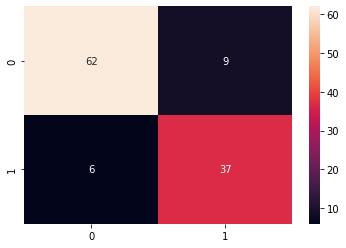

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, clf_no_reg.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, clf_no_reg.predict(X_test)), annot=True)

**Task**<br>
Apply logistic regression on MNIST dataset. 
The MNIST database of handwritten digits, available from this [page](http://yann.lecun.com/exdb/mnist/), has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

You can use [scikit-learn's `LogisticRegression` class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). The images in MNIST dataset are of shape (28 x 28) pixels. So, there are 784 pixels in total. You can consider each pixel as a feature. In summary, a sample from your training or test set will be of shape (1 x 784). 

Loading data

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

1. Plot one image from each class e.g., (0, 1, 2, 3, ...)

Hint: You can create a function `view_image(img)` that will take a numpy array of shape (1, 784) as input and reshape it to (28,28) numpy array. Then it will plot this numpy array in grayscale using `matplotlib.pyplot`.

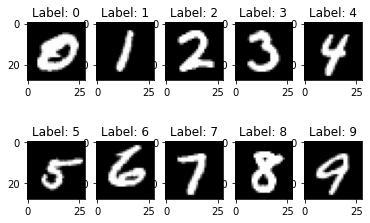

In [ ]:
# Your code goes here
images = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in range (0,len(X)):
    images[int(y[i])] = X[i]

import matplotlib.pyplot as plt

for i in range (0, len(images)):
    plt.subplot(2, 5, i+1)
    image = np.reshape(images[i], (28, 28))
    plt. imshow(image, cmap='gray')
    plt.title(f'Label: {i}')
plt.show()


2. Print one sample and decide whether you need to normalize the images. If yes, then do so.

In [ ]:
# Your code goes here
print(X[0])
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
print("-------------------")
print(X[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

3. Split your dataset into training and test set. Use `random_state = 7`. 80% of your whole data should be in training set.

In [ ]:
# Your code goes here
# for i in range (0, len(y)):
#     y[i] = int(y[i])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

4. Train the model for maximum 100 iterations without any regularization. Evaluate your trained model on test set. 



In [ ]:
# Your code goes here
from sklearn import metrics
MAX_ITER = 100
clf_no_reg = LogisticRegression(max_iter = MAX_ITER, penalty='none', solver='lbfgs')
clf_no_reg.fit(X_train, y_train)
print(f'Accuracy {metrics.accuracy_score(y_test, clf_no_reg.predict(X_test))*100}%')

Accuracy 92.67142857142858%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



5.   Show the effect of different `penalty/regularization` ('l1', 'l2') method.

In [ ]:
# Your code goes here
clf_l2_reg = LogisticRegression(max_iter = MAX_ITER, penalty='l2', solver='saga')
clf_l2_reg.fit(X_train, y_train)
print(f'Accuracy {metrics.accuracy_score(y_test, clf_l2_reg.predict(X_test))*100}%')

clf_l1_reg = LogisticRegression(max_iter = MAX_ITER, penalty='l1', solver='saga')
clf_l1_reg.fit(X_train, y_train)
print(f'Accuracy {metrics.accuracy_score(y_test, clf_l2_reg.predict(X_test))*100}%')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Accuracy 92.70714285714286%


6. Show the effect of different `regularization strength` (1/C while using scikit-learn).

In [ ]:
# Your code goes here
clf_l2_reg_10 = LogisticRegression(max_iter = MAX_ITER, penalty='l2', C=0.1)
clf_l2_reg.fit(X_train, y_train)
print(f'Accuracy {metrics.accuracy_score(y_test, clf_l2_reg.predict(X_test))*100}%')

clf_l2_reg_100 = LogisticRegression(max_iter = MAX_ITER, penalty='l2', C=0.01)
clf_l2_reg.fit(X_train, y_train)
print(f'Accuracy {metrics.accuracy_score(y_test, clf_l2_reg.predict(X_test))*100}%')

clf_l2_reg_1000 = LogisticRegression(max_iter = MAX_ITER, penalty='l2', C=0.001)
clf_l2_reg.fit(X_train, y_train)
print(f'Accuracy {metrics.accuracy_score(y_test, clf_l2_reg.predict(X_test))*100}%')

7. Plot `5` misclassified samples, their `actual label`, and `predicted label` using the output from your best performing model.

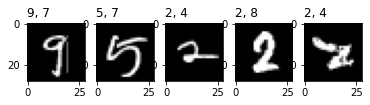

In [ ]:
# Your code goes here
y_pred = clf_no_reg.predict(X_test)
cnt = 0
plt.xticks([])
for i in range(0, len(y_test)):
    if(y_test[i]!=y_pred[i]):
        plt.subplot(1,5,cnt+1)
        plt.imshow(np.reshape(X_test[i],(28, 28)), cmap='gray')
        plt.title(f'{y_test[i]}, {y_pred[i]}', loc='left')
        cnt = cnt+1
    if(cnt==5):
        break
plt.show()


8. Plot the confusion matrix of the test set of best performing setup. 

[[1343    0    7    4    2    6    8    1    9    5]
 [   0 1526    7    6    0    5    0    6   11    2]
 [   9   18 1258   25   18    6   18   13   23    5]
 [   6    4   27 1336    3   38    1   10   20   13]
 [   6    6    8    2 1261    2    7    1    7   39]
 [  10    7    7   40   20 1064   29    8   46    8]
 [  14    5    4    1   11   18 1295    1    3    0]
 [   2    2   17    3   10    3    1 1406    3   44]
 [  10   33   18   36    4   43    9    4 1203   20]
 [  10    7    1   10   23    7    0   52    8 1282]]


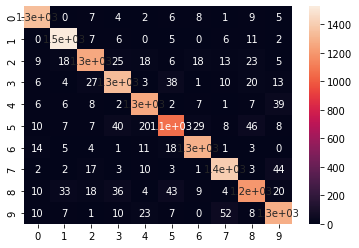

In [ ]:
# Your code goes here
import seaborn as sns
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, clf_no_reg.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, clf_no_reg.predict(X_test)), annot=True)